# Testing Pandas 2.0.0rc0
### Examining the difference in performance in Pandas when using PyArrow backend vs Numpy backend and PyArrow backend vs Polars

## Loading required packages and testing versions

In [1]:
import numpy as np
import pandas
import pandas as pd
import polars as pl

print(f"numpy {np.__version__}")
print(f"pandas {pd.__version__}")
print(f"polars {pl.__version__}")

numpy 1.24.2
pandas 2.0.0rc0
polars 0.16.11


## Reading data with Pandas - Numpy backend

## Loading Electric Vehicle Dataset

In [2]:
%timeit
df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
1,3FA6P0PU7H,Sedgwick,Derby,KS,67037.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NaN,138214331,POINT (-97.27013 37.54531),NaN,2.017301e+10
2,1N4AZ0CP8D,Snohomish,Marysville,WA,98271.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,3129059,POINT (-122.19388 48.15353),PUGET SOUND ENERGY INC,5.306105e+10
3,WBY8P8C58K,Kitsap,Bremerton,WA,98337.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,26.0,166525635,POINT (-122.62749 47.565),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EA7K,Snohomish,Edmonds,WA,98026.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,475248315,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
df.count()

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118959 entries, 0 to 118958
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         118959 non-null  object 
 1   County                                             118957 non-null  object 
 2   City                                               118957 non-null  object 
 3   State                                              118959 non-null  object 
 4   Postal Code                                        118957 non-null  float64
 5   Model Year                                         118959 non-null  int64  
 6   Make                                               118959 non-null  object 
 7   Model                                              118826 non-null  object 
 8   Electric Vehicle Type                              118959 non-null  object

## Test backend object

In [6]:
df["Postal Code"].values

array([92051., 67037., 98271., ..., 98052., 98109., 98282.])

## Numpy Backend
Resulting in a **float64** due to null values

In [7]:
type(df["Postal Code"].values)

numpy.ndarray

## Using the PyArrow Backend

In [8]:
pd.options.mode.dtype_backend = "pyarrow"

In [9]:
df_v2 = pd.read_csv("data/Electric_Vehicle_Population_Data.csv", use_nullable_dtypes=True)

In [10]:
df_v2.count()

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

In [11]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118959 entries, 0 to 118958
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype          
---  ------                                             --------------   -----          
 0   VIN (1-10)                                         118959 non-null  string[pyarrow]
 1   County                                             118957 non-null  string[pyarrow]
 2   City                                               118957 non-null  string[pyarrow]
 3   State                                              118959 non-null  string[pyarrow]
 4   Postal Code                                        118957 non-null  int64[pyarrow] 
 5   Model Year                                         118959 non-null  int64[pyarrow] 
 6   Make                                               118959 non-null  string[pyarrow]
 7   Model                                              118826 non-null  string[pyarrow]

In [12]:
df_v2["Postal Code"].values

<ArrowExtensionArray>
[92051, 67037, 98271, 98337, 98026, 99362, 98204, 98277, 98021, 98501,
 ...
 98112, 98040, 98418, 98275, 98502, 98020, 98004, 98052, 98109, 98282]
Length: 118959, dtype: int64[pyarrow]

In [13]:
type(df_v2["Postal Code"].values)

pandas.core.arrays.arrow.array.ArrowExtensionArray

In [15]:
%%timeit
df_v2 = pd.read_csv(
    "data/Electric_Vehicle_Population_Data.csv",
    engine="pyarrow",
    use_nullable_dtypes=True)

13.2 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118959 entries, 0 to 118958
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype          
---  ------                                             --------------   -----          
 0   VIN (1-10)                                         118959 non-null  string[pyarrow]
 1   County                                             118957 non-null  string[pyarrow]
 2   City                                               118957 non-null  string[pyarrow]
 3   State                                              118959 non-null  string[pyarrow]
 4   Postal Code                                        118957 non-null  int64[pyarrow] 
 5   Model Year                                         118959 non-null  int64[pyarrow] 
 6   Make                                               118959 non-null  string[pyarrow]
 7   Model                                              118826 non-null  string[pyarrow]

## Speed


In [17]:
%timeit df["Electric Range"].mean()

104 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [18]:
%timeit df_v2["Electric Range"].mean()

35.6 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Load Times

In [19]:
%%timeit
df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

210 ms ± 4.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Arrow REQUIRES nullable option, but does not have to have the engine

In [20]:
%%timeit
df_v2 = pd.read_csv(
    "data/Electric_Vehicle_Population_Data.csv",
    engine="pyarrow",
    use_nullable_dtypes=True)

13.5 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
df_v2.count()

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

In [22]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118959 entries, 0 to 118958
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype          
---  ------                                             --------------   -----          
 0   VIN (1-10)                                         118959 non-null  string[pyarrow]
 1   County                                             118957 non-null  string[pyarrow]
 2   City                                               118957 non-null  string[pyarrow]
 3   State                                              118959 non-null  string[pyarrow]
 4   Postal Code                                        118957 non-null  int64[pyarrow] 
 5   Model Year                                         118959 non-null  int64[pyarrow] 
 6   Make                                               118959 non-null  string[pyarrow]
 7   Model                                              118826 non-null  string[pyarrow]

In [23]:
%%timeit
df["State"].str.startswith("K")

22.5 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
df_v2["State"].str.startswith("K")

794 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Converting to Polars

In [30]:
df_polars = pl.from_pandas(df_v2)
# df_polars = pl.read_csv("data/Electric_Vehicle_Population_Data.csv")

df_p = pl.DataFrame({"foo": [1, 2, 3], "bar": [None, "bak", "zip"]})

In [33]:
df_p.head()

foo,bar
i64,str
1,null
2,"""bak"""
3,"""zip"""


In [46]:
agg_polars = (
    df_polars.groupby("State")
    .agg(pl.col(["Electric Range"])
    .sum().alias("Total"))
)

In [32]:
df_polars.head()

VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64
"""5YJ3E1EA8J""","""San Diego""","""Oceanside""","""CA""",92051,2018,"""TESLA""","""MODEL 3""","""Battery Electr...","""Clean Alternat...",215,0,null,153998050,null,null,6073018509
"""3FA6P0PU7H""","""Sedgwick""","""Derby""","""KS""",67037,2017,"""FORD""","""FUSION""","""Plug-in Hybrid...","""Not eligible d...",21,0,null,138214331,"""POINT (-97.270...",null,20173009801
"""1N4AZ0CP8D""","""Snohomish""","""Marysville""","""WA""",98271,2013,"""NISSAN""","""LEAF""","""Battery Electr...","""Clean Alternat...",75,0,38,3129059,"""POINT (-122.19...","""PUGET SOUND EN...",53061052805
"""WBY8P8C58K""","""Kitsap""","""Bremerton""","""WA""",98337,2019,"""BMW""","""I3""","""Plug-in Hybrid...","""Clean Alternat...",126,0,26,166525635,"""POINT (-122.62...","""PUGET SOUND EN...",53035080500
"""5YJ3E1EA7K""","""Snohomish""","""Edmonds""","""WA""",98026,2019,"""TESLA""","""MODEL 3""","""Battery Electr...","""Clean Alternat...",220,0,32,475248315,"""POINT (-122.31...","""PUGET SOUND EN...",53061050800


In [38]:
df.count()

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

In [47]:
agg_polars.head()

State,Total
str,i64
"""MA""",53
"""NY""",326
"""BC""",220
"""PA""",351
"""DE""",0


In [48]:
agg_df = agg_polars.to_pandas()

<Axes: title={'center': 'Top Electric Range'}, ylabel='State'>

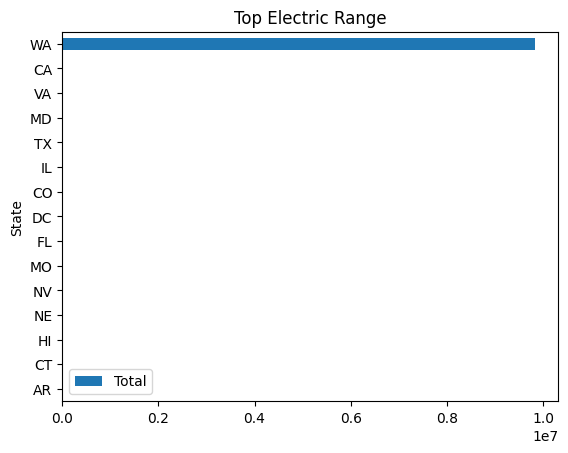

In [51]:
agg_df.set_index("State") \
    .sort_values("Total", ascending=False) \
    .head(15) \
    .sort_values("Total") \
    .plot(kind="barh", title="Top Electric Range")